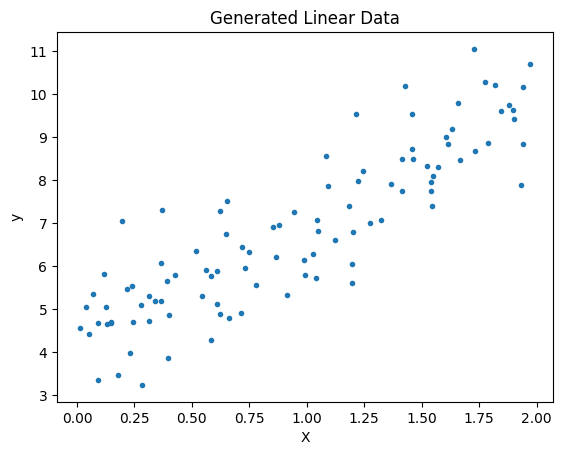

In [1]:
# Let's evaluate the normal equation as a solution to obtain the parameters of a linear function.
# The goal is to find the best-fitting parameters such that the prediction minimizes the Mean Squared Error (MSE).
# We use MSE instead of RMSE as it's easier to compute analytically.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear-looking data for testing the normal equation
np.random.seed(42)  # Ensure reproducibility
X = 2 * np.random.rand(100, 1)  # Generate 100 random values between 0 and 2
noise = np.random.randn(100, 1)  # Add random Gaussian noise
y = 4 + 3 * X + noise  # Linear function with some noise (y = 4 + 3X + noise)

# Visualizing the generated data
plt.plot(X, y, ".")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Linear Data')
plt.show()

In [2]:
# Compute the best parameters (theta) using the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term (x0 = 1) to each instance

# Normal equation: theta_best = (X^T * X)^(-1) * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta computed using Normal Equation:", theta_best)

Theta computed using Normal Equation: [[4.21509616]
 [2.77011339]]


In [3]:
# The actual values should be theta_0=4 and theta_1=3, but due to noise,
# we get slightly different values (e.g., theta_0 ≈ 4.226 and theta_1 ≈ 2.771).

# Making predictions using the computed theta values
X_new = np.array([[0], [2]])  # Define new input values
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term

y_predict = X_new_b.dot(theta_best)  # Compute predictions
print("Predictions:", y_predict)

Predictions: [[4.21509616]
 [9.75532293]]


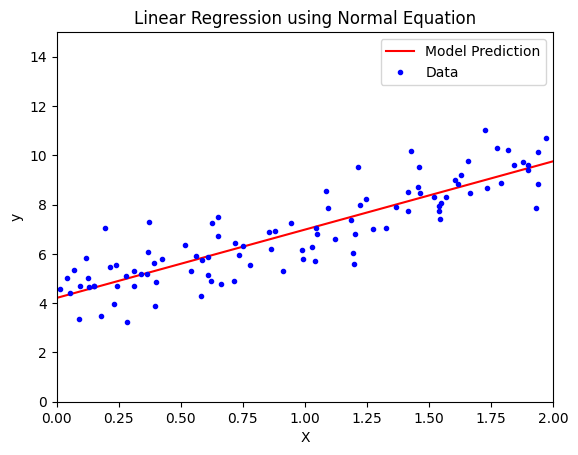

In [4]:

# Plot model predictions against data
plt.plot(X_new, y_predict, "r-", label="Model Prediction")  # Regression line
plt.plot(X, y, "b.", label="Data")  # Data points
plt.axis([0, 2, 0, 15])  # Set axis limits
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Normal Equation')
plt.show()

In [5]:
# Let's test linear regression using Scikit-Learn for comparison
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)  # Train the model on data

# Retrieve intercept and coefficients
print("Intercept (theta_0):", lin_reg.intercept_)
print("Coefficient (theta_1):", lin_reg.coef_)

Intercept (theta_0): [4.21509616]
Coefficient (theta_1): [[2.77011339]]


In [6]:
# Make predictions with the trained model
sklearn_predictions = lin_reg.predict(X_new)
print("Scikit-Learn Predictions:", sklearn_predictions)

Scikit-Learn Predictions: [[4.21509616]
 [9.75532293]]


In [7]:
# Retrieve intercept and coefficients
print("Intercept (theta_0):", lin_reg.intercept_)
print("Coefficient (theta_1):", lin_reg.coef_)

Intercept (theta_0): [4.21509616]
Coefficient (theta_1): [[2.77011339]]


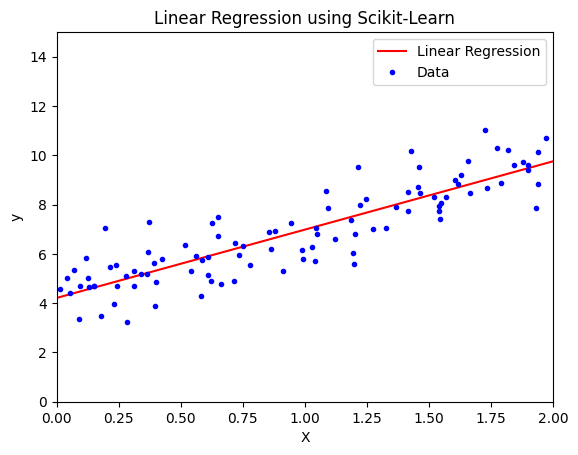

In [8]:
# Make predictions with the trained model
y_lin_reg = lin_reg.intercept_ + lin_reg.coef_ * X_new

# Plot Scikit-Learn model predictions
plt.plot(X_new, y_lin_reg, "r-", label="Linear Regression")
plt.plot(X, y, "b.", label="Data")
plt.axis([0, 2, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Scikit-Learn')
plt.show()

In [9]:
# Using the least squares method directly from NumPy (SVD-based solution)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta computed using SVD-based least squares:", theta_best_svd)

Theta computed using SVD-based least squares: [[4.21509616]
 [2.77011339]]


In [10]:
# Check page 117 to understand the theory behind this functions and their utility.
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [11]:
# Gradient Descent Implementation
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100  # Number of training samples

# Random initialization of theta
theta = np.random.randn(2, 1)

# Batch Gradient Descent loop
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta computed using Batch Gradient Descent:", theta)

Theta computed using Batch Gradient Descent: [[4.21509616]
 [2.77011339]]


In [12]:
# Stochastic Gradient Descent Implementation
n_epochs = 50  # Number of passes through the dataset
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of theta
theta = np.random.randn(2, 1)

# Stochastic Gradient Descent loop
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta computed using Stochastic Gradient Descent:", theta)

Theta computed using Stochastic Gradient Descent: [[4.18475289]
 [2.73036719]]


In [13]:
from sklearn.linear_model import SGDRegressor

# Using Scikit-Learn's SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

# Retrieve intercept and coefficients from SGDRegressor
print("Intercept (theta_0) from SGDRegressor:", sgd_reg.intercept_)
print("Coefficient (theta_1) from SGDRegressor:", sgd_reg.coef_)

Intercept (theta_0) from SGDRegressor: [3.88870724]
Coefficient (theta_1) from SGDRegressor: [3.06237402]


In [14]:
# Compare the results of all three models
print("\nComparison of Methods:")
print("Normal Equation: Theta_0 =", theta_best[0], "Theta_1 =", theta_best[1])
print("Scikit-Learn Linear Regression: Theta_0 =", lin_reg.intercept_, "Theta_1 =", lin_reg.coef_[0])
print("SVD Least Squares: Theta_0 =", theta_best_svd[0], "Theta_1 =", theta_best_svd[1])
print("Batch Gradient Descent: Theta_0 =", theta[0], "Theta_1 =", theta[1])
print("Stochastic Gradient Descent: Theta_0 =", sgd_reg.intercept_, "Theta_1 =", sgd_reg.coef_[0])


Comparison of Methods:
Normal Equation: Theta_0 = [4.21509616] Theta_1 = [2.77011339]
Scikit-Learn Linear Regression: Theta_0 = [4.21509616] Theta_1 = [2.77011339]
SVD Least Squares: Theta_0 = [4.21509616] Theta_1 = [2.77011339]
Batch Gradient Descent: Theta_0 = [4.18475289] Theta_1 = [2.73036719]
Stochastic Gradient Descent: Theta_0 = [3.88870724] Theta_1 = 3.062374020471608
